<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Unzip-the-data" data-toc-modified-id="Unzip-the-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Unzip the data</a></span></li><li><span><a href="#Image-augmentation:-crop" data-toc-modified-id="Image-augmentation:-crop-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Image augmentation: crop</a></span><ul class="toc-item"><li><span><a href="#V.1" data-toc-modified-id="V.1-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>V.1</a></span></li><li><span><a href="#V.2" data-toc-modified-id="V.2-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>V.2</a></span></li></ul></li><li><span><a href="#Edge-detection-and-cropping" data-toc-modified-id="Edge-detection-and-cropping-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Edge detection and cropping</a></span><ul class="toc-item"><li><span><a href="#V.3" data-toc-modified-id="V.3-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>V.3</a></span></li><li><span><a href="#V.4" data-toc-modified-id="V.4-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>V.4</a></span></li><li><span><a href="#V.5" data-toc-modified-id="V.5-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>V.5</a></span></li></ul></li></ul></li><li><span><a href="#SIFT" data-toc-modified-id="SIFT-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>SIFT</a></span><ul class="toc-item"><li><span><a href="#Store-all-local-descriptors" data-toc-modified-id="Store-all-local-descriptors-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Store all local descriptors</a></span></li><li><span><a href="#Read-a-single-local-descriptor" data-toc-modified-id="Read-a-single-local-descriptor-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Read a single local descriptor</a></span></li></ul></li><li><span><a href="#Feature-matching" data-toc-modified-id="Feature-matching-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature matching</a></span></li></ul></div>

Before you run this notebook, please make sure the Runtime type is in GPU: *Runtime* --> *Change runtime type* --> *GPU*.

Note, we need to utilize opencv version Python version 4.4 or above in order to run SIFT algorithm properly.
- Ref: https://stackoverflow.com/questions/64474059/how-to-use-sift-and-surf-algorithm-in-google-colab-with-opencv4

# Setup

In [1]:
!/home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip -V

/bin/bash: line 1: /home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip: Is a directory


In [13]:
# setup to see the execution time in each cell

!/home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip install ipython-autotime
!/home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip install directory_structure
!/home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip install handcalcs
!/home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip install pytz
# !/home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip install opencv-contrib-python==4.4.0.44
# %load_ext autotime

/bin/bash: line 1: /home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip: Is a directory
/bin/bash: line 1: /home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip: Is a directory
/bin/bash: line 1: /home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip: Is a directory
/bin/bash: line 1: /home/hui/anaconda3/envs/ml/lib/python3.10/site-packages/pip: Is a directory


In [25]:
# %%time

import pandas as pd
import os
import random
import glob
import PIL
from PIL import Image
import numpy as np
# import cupy as cp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
# from google.colab.patches import cv2_imshow
# from directory_structure import Tree
import shutil
import handcalcs.render
import pickle

In [24]:
print (cv2.__version__)

4.5.5


# Preprocessing

Use this if you are using Google Colab.

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive
time: 15.5 s (started: 2022-06-20 16:17:45 +00:00)


In [4]:
# replace the dir if needed

ROOT_DIR = "/home/hui/Projects/g5/datasets/cv2"  # Henry's dir
# ROOT_DIR = "/content/drive/MyDrive/Project - G5/Dataset/"    #Lejia's dir
# ROOT_DIR = "/content/drive/MyDrive/Project - G5/Dataset/" #Nan's dir
# ROOT_DIR = "/content/drive/MyDrive/Project - G5/Dataset"

## Unzip the data

In [5]:
%%time

os.chdir(ROOT_DIR)
print("Current dir: {}".format(os.getcwd()))

Current dir: /home/hui/Projects/g5/datasets/cv2
CPU times: user 813 µs, sys: 439 µs, total: 1.25 ms
Wall time: 746 µs


In [6]:
# print(Tree(os.getcwd()))

In [ ]:
%%time

# check if you have unzipped the compressed data or not

# change to the correct root dir
os.chdir(ROOT_DIR)

if not os.path.exists(os.getcwd() + "/unzip"):

    # create the unzip dir
    os.mkdir("unzip")

    # navigate to compress folder
    os.chdir("./compress")

    # get all file names
    all_file_names = os.listdir(os.getcwd())

    # unzip all files to a specific dir
    for file_name in all_file_names:
        shutil.unpack_archive(file_name, ROOT_DIR + "/unzip")

    print("All jobs done!")

## Image augmentation: crop

There is a need to crop the image since the SIFT detects the background as part of the local descriptors.

Code ref: https://github.com/matterport/Mask_RCNN/issues/230#issuecomment-365985696

### V.1

In [8]:
def random_crop(img, width, height):
    assert img.shape[0] >= height
    assert img.shape[1] >= width
    x = random.randint(0, img.shape[1] - width)
    y = random.randint(0, img.shape[0] - height)
    img = img[y:y + height, x:x + width]
    return img

(Text(0.5, 1.0, 'Cropped Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

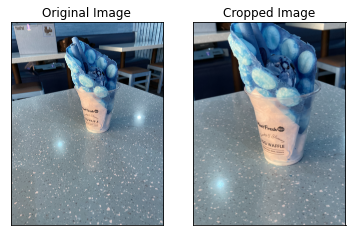

time: 2.13 s (started: 2022-06-20 18:40:40 +00:00)


In [109]:
index = 1

os.chdir(ROOT_DIR + "/unzip")

all_folders = os.listdir(os.getcwd())

os.chdir("./" + all_folders[index])
all_files = os.listdir(os.getcwd())

random_sample_index = random.randint(0, len(all_files))

# sample_img_path = all_files[random_sample_index]
sample_img_path = all_files[index]

sample_img = cv2.imread(sample_img_path)
h_, w_, c_ = sample_img.shape

img_cropped = random_crop(sample_img, round(w_ * (.6)), round(h_ * (.6)))

plt.subplot(121), plt.imshow(sample_img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(img_cropped)
plt.title('Cropped Image'), plt.xticks([]), plt.yticks([])

### V.2

(4032, 3024, 3)


(Text(0.5, 1.0, 'Cropped Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

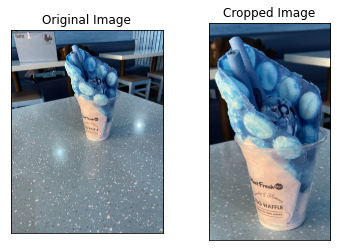

time: 2.12 s (started: 2022-06-20 18:47:09 +00:00)


In [124]:
index = 1

os.chdir(ROOT_DIR + "/unzip")

all_folders = os.listdir(os.getcwd())

os.chdir("./" + all_folders[index])
all_files = os.listdir(os.getcwd())

random_sample_index = random.randint(0, len(all_files))

# sample_img_path = all_files[random_sample_index]
sample_img_path = all_files[index]

sample_img = cv2.imread(sample_img_path)
h_, w_, c_ = sample_img.shape

# img_cropped = image[startY:endY, startX:endX]
img_cropped = sample_img[150:2300, 1000:2200]

print(sample_img.shape)

plt.subplot(121), plt.imshow(sample_img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(img_cropped)
plt.title('Cropped Image'), plt.xticks([]), plt.yticks([])

## Edge detection and cropping

### V.3

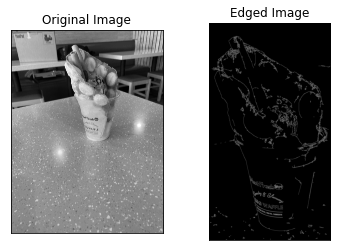

time: 970 ms (started: 2022-06-20 18:47:38 +00:00)


In [125]:
threshold_1 = 30
threshold_2 = 250

edges = cv2.Canny(cv2.cvtColor(img_cropped, cv2.COLOR_BGR2GRAY),
                  threshold1=threshold_1,
                  threshold2=threshold_2)

plt.subplot(121), plt.imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2GRAY),
                             cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edged Image'), plt.xticks([]), plt.yticks([])

plt.show()

### V.4

In [132]:
threshold_1 = 30
threshold_2 = 250

img_cropped = sample_img[150:2300, 1000:2200]

edges = cv2.Canny(cv2.cvtColor(img_cropped, cv2.COLOR_BGR2GRAY),
                  threshold1=threshold_1,
                  threshold2=threshold_2)

# cnts = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnts = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)
idx = 0

cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

# for c in cnts:
#     x,y,w,h = cv2.boundingRect(c)
#     ROI = sample_img[y:y+h, x:x+w]
#     break

for c in cnts:
    x, y, w, h = cv2.boundingRect(c)

    if w > 100 and h > 100:
        idx += 1
        new_img = sample_img[y:y + h, x:x + w]
        # cropping images
        cv2.imwrite(ROOT_DIR + "/cropped/" + str(idx) + '.png', new_img)

# cv2_imshow(ROI)

time: 171 ms (started: 2022-06-20 18:59:00 +00:00)


### V.5

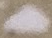

time: 79.2 ms (started: 2022-06-20 17:51:23 +00:00)


In [51]:
threshold_1 = 50
threshold_2 = 200

edges = cv2.Canny(cv2.cvtColor(sample_img, cv2.COLOR_BGR2GRAY),
                  threshold1=threshold_1,
                  threshold2=threshold_2)

cnts = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    ROI = sample_img[y:y + h, x:x + w]
    break

cv2_imshow(ROI)

# SIFT

In [12]:
def sift_descriptor(file_path, write_sample=False):
    # read the file as opencv obj
    img = cv2.imread(file_path)
    #     img=mpimg.imread(file_path)

    # convert the image into gray scale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # create a sift obj
    sift = cv2.SIFT_create()

    # compute the keypoints and the local descriptor
    keypoints_, descriptors_ = sift.detectAndCompute(img_gray, None)

    # are you write a sample of SIFT img?
    if write_sample:
        # draw the keypoints of the img
        img_kp = cv2.drawKeypoints(img_gray, keypoints_, img)

        # write the img with keypoints to disk
        cv2.imwrite(ROOT_DIR + '/sample1_sift_kp.jpg', img_kp)

    return keypoints_, descriptors_

In [134]:
# os.chdir(ROOT_DIR+"/unzip")

# all_folders = os.listdir(os.getcwd())

# os.chdir("./" + all_folders[0])
# all_files = os.listdir(os.getcwd())

# random_sample_index = random.randint(0, len(all_files))

# sample_img_path = all_files[random_sample_index]

time: 8.05 ms (started: 2022-06-20 19:23:41 +00:00)


In [ ]:
# sift_descriptor(sample_img_path, write_sample=True)

In [13]:
# target file path
img1 = ROOT_DIR + "/Hot Red Bean Soup.png"
img2 = ROOT_DIR + "/Double Taro Signature.png"

In [14]:
kp1, de1 = sift_descriptor(img1)
kp2, de2 = sift_descriptor(img2)

print("Retrieved all kp and local descriptors!")

Retrieved all kp and local descriptors!


## Store all local descriptors

In [35]:
# specify a location where the local descriptor is going to be stored
SAVE_DE_DIR = "/home/hui/Projects/g5/datasets/descriptors"

if not os.path.exists(SAVE_DE_DIR):
    os.mkdir(SAVE_DE_DIR)

# change to the right dir
os.chdir(ROOT_DIR)

# get a list of all file names
files = os.listdir(os.getcwd())

DE_RESULT = list()

# compute local descriptor for all images
for file in files:
    kp, de = sift_descriptor(file)
    DE_RESULT.append(de)

# write all local descriptor into a file
for i in range(len(files)):
    # save the descriptor as a txt file and remove the 'jpg' and 'png' file extension
    with open(SAVE_DE_DIR + '/ ' + str(files[i].split('.')[0]) + '.txt', 'wb') as f:
        pickle.dump(DE_RESULT[i], f)

print(">>> All operations are done!")

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


>>> All operations are done!


## Read a single local descriptor

In [38]:
def retrieve_stored_descriptor(product_name:str):
    try:
        file_path = "/home/hui/Projects/g5/datasets/descriptors/" + product_name + ".txt"
        file = open(file_path, 'rb')
        descriptor = pickle.load(file)
        file.close()
        return descriptor
    except FileNotFoundError:
        print("Wrong file or file path")
        return None
    except e:
        print("Error due to: {}".format(e))
        return None

In [39]:
product_name = " Boba Tofu Pudding"
print(retrieve_stored_descriptor(product_name))

[[37.  8.  0. ...  0.  0.  1.]
 [ 0.  1.  1. ...  0.  0.  0.]
 [ 0.  1. 14. ...  0.  0.  2.]
 ...
 [22.  1.  0. ...  6.  6. 35.]
 [ 1.  5.  2. ...  0.  0.  0.]
 [ 5.  0.  0. ... 11.  1.  1.]]


# Feature matching

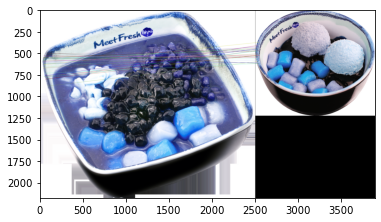

(<matplotlib.image.AxesImage at 0x7f2fa2823640>, None)

In [40]:
# feature matching

# instantiate a Brute-force matcher with L1 norm
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

# match the two descriptors
matches = bf.match(de1, de2)

# sort the match result based on feature vector distance
matches = sorted(matches, key=lambda x: x.distance)

# draw the match image (cross reference) and then display it
img3 = cv2.drawMatches(cv2.imread(img1),
                       kp1,
                       cv2.imread(img2),
                       kp2,
                       matches[:50],
                       cv2.imread(img2),
                       flags=2)
# img=mpimg.imread('stinkbug.png')
plt.imshow(img3), plt.show()

In [35]:
dir(matches[0])

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'distance',
 'imgIdx',
 'queryIdx',
 'trainIdx']

In [41]:
def match_products(product_1, product_2):
    # instantiate a Brute-force matcher with L1 norm
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

    # match the two descriptors
    matches = bf.match(retrieve_stored_descriptor(product_1), retrieve_stored_descriptor(product_2))

    # sort the match result based on feature vector distance
    matches = sorted(matches, key=lambda x: x.distance)
    
    return matches

In [60]:
PRODUCT_NAME_1 = " Fluffy Green Tea"
PRODUCT_NAME_2 = " Fluffy Jin Xuan Tea"

print(match_products(PRODUCT_NAME_1, PRODUCT_NAME_2)[1].distance)

522.0


- Mean
- Median

- Distance formula

- Visualization (feature matrix)

- Clustering

In [62]:
from numpy import mean
# median


dist = list()
for item in match_products(PRODUCT_NAME_1, PRODUCT_NAME_2):
    dist.append(item.distance)
    
print(mean(dist))

1163.851851851852


In [58]:
retrieve_stored_descriptor(PRODUCT_NAME_1).shape

(56, 128)

In [59]:
retrieve_stored_descriptor(PRODUCT_NAME_2).shape

(37, 128)